In [12]:
#Impport necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load the dataset
df = pd.read_csv(r"C:\Users\91878\Dropbox\PC\Desktop\2nd sem books pdf\Python project(other)\medical_examination.csv")

In [16]:
# Add 'overweight' column
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)

In [17]:
# Normalize data
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [18]:
# Filter out incorrect data
df = df[(df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

In [19]:
# Create 'overweight' column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2 > 25).astype(int)

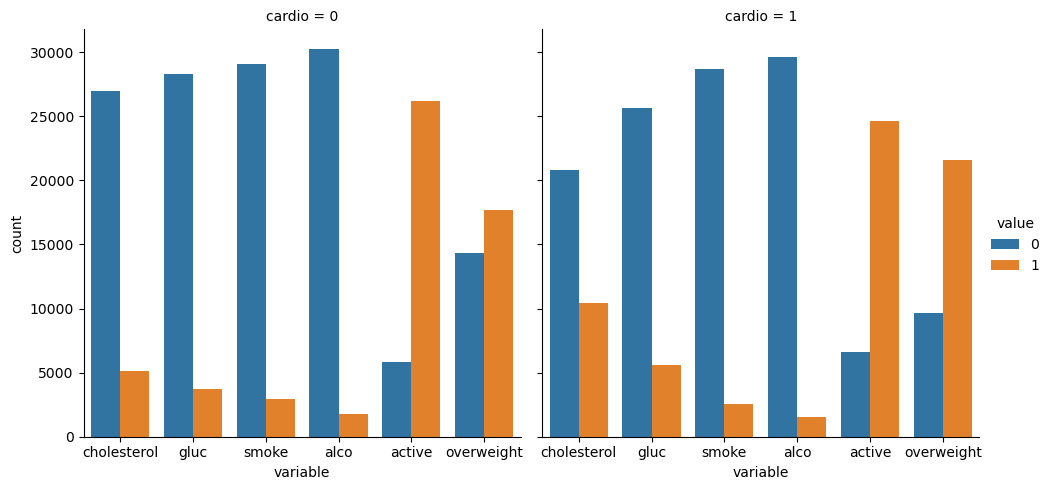

In [24]:
# Draw catplot
def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat['variable'] = df_cat['variable'].astype(str)
    df_cat['value'] = df_cat['value'].astype(str)
    df_cat['cardio'] = df_cat['cardio'].astype(str)
    sns.catplot(data=df_cat, kind='count', x='variable', hue='value', col='cardio')
    plt.show()

draw_cat_plot()

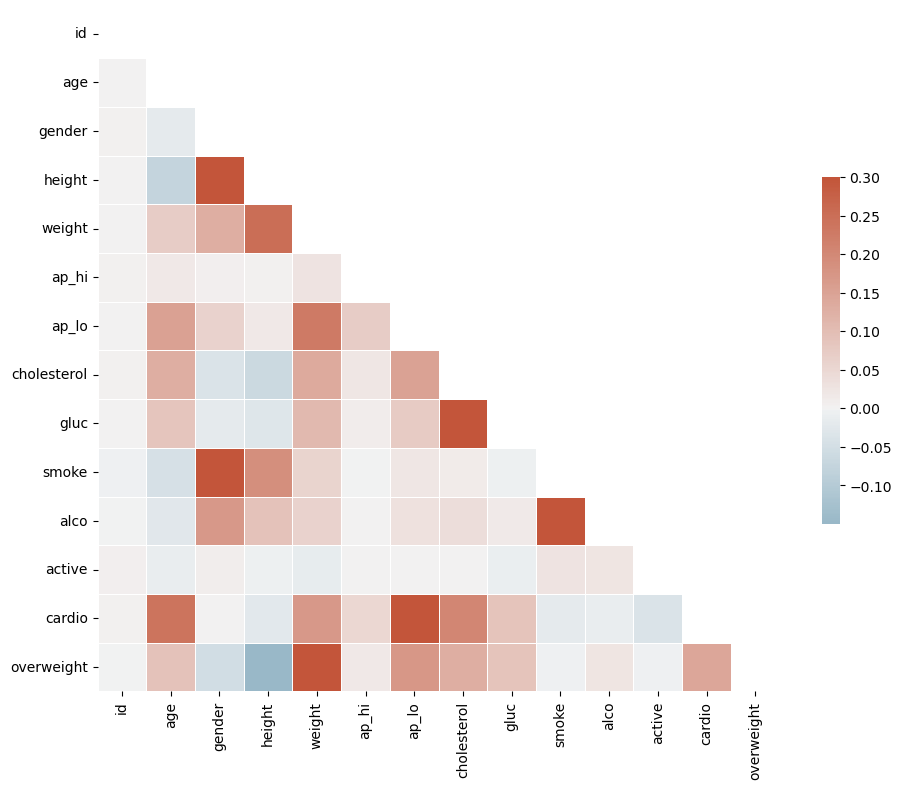

In [26]:
import numpy as np
# Create correlation matrix
def draw_heat_map():
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.show()

draw_heat_map()